In [2]:
#Imports
#from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , make_scorer , classification_report , precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [3]:
iris = pd.read_csv("Iris.csv") #load the dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = iris.drop(['Species','Id'], axis=1)
y = iris['Species']

In [5]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris.drop('Id',axis=1,inplace=True)

In [10]:
iris['Species'].unique() # 0:Iris-setosa 1:Iris-versicolor 2:Iris-virginica

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


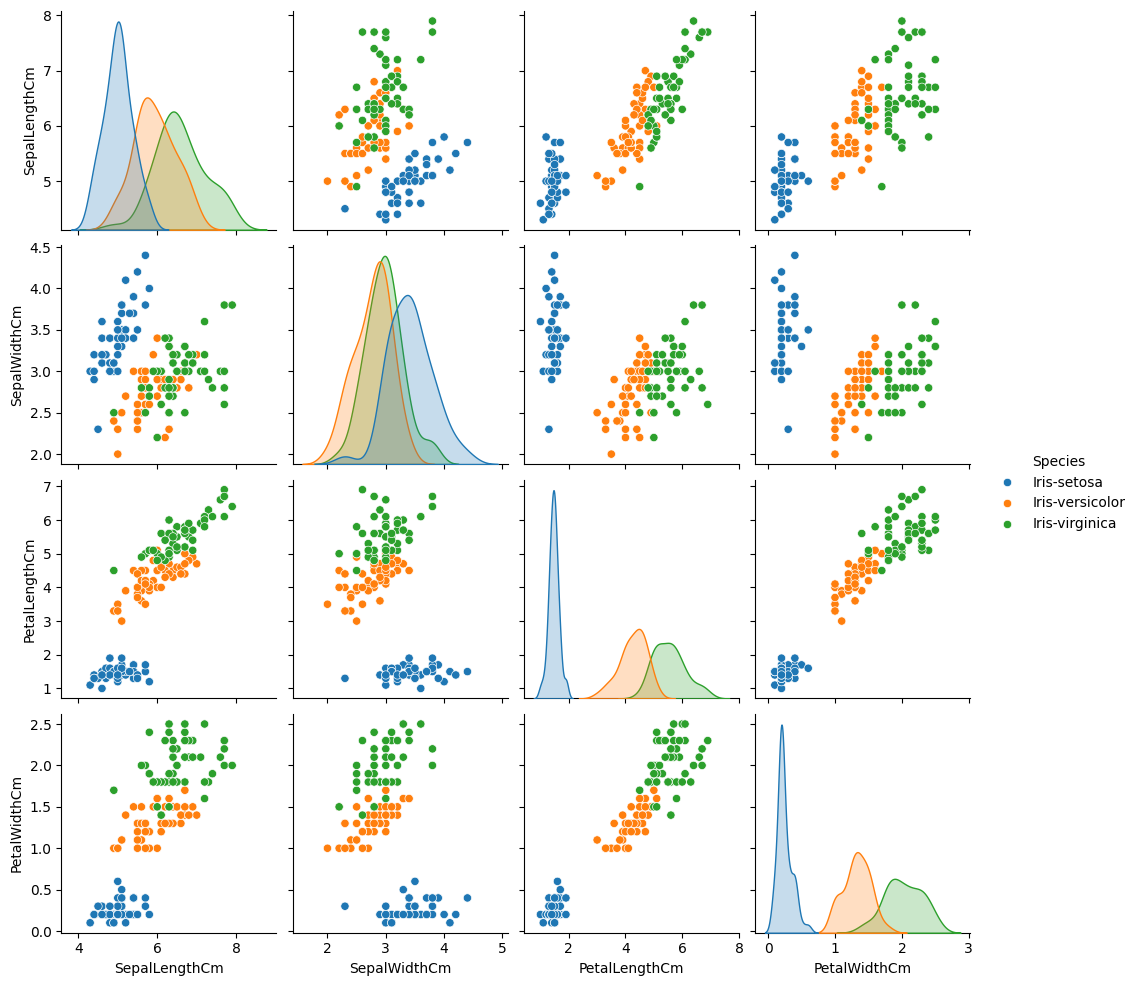

In [12]:
# Visualize the dataset
sns.pairplot(iris, hue='Species')
plt.show()

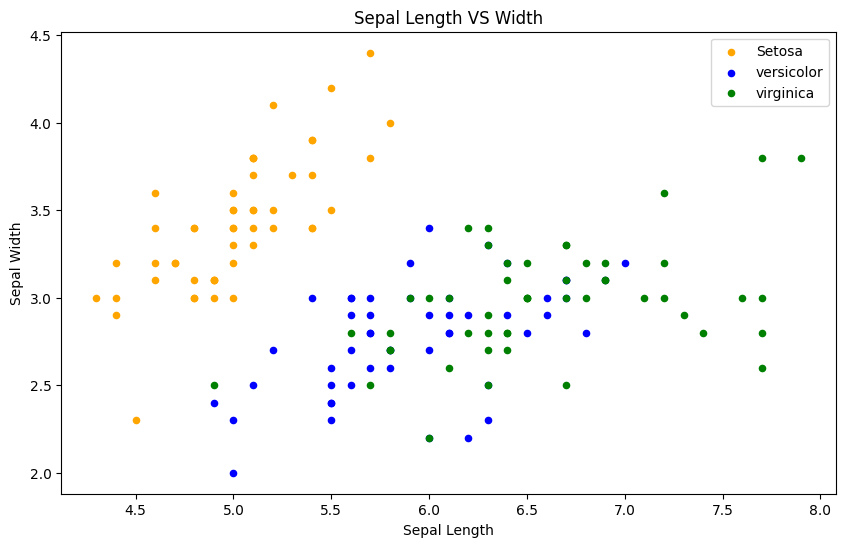

In [13]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

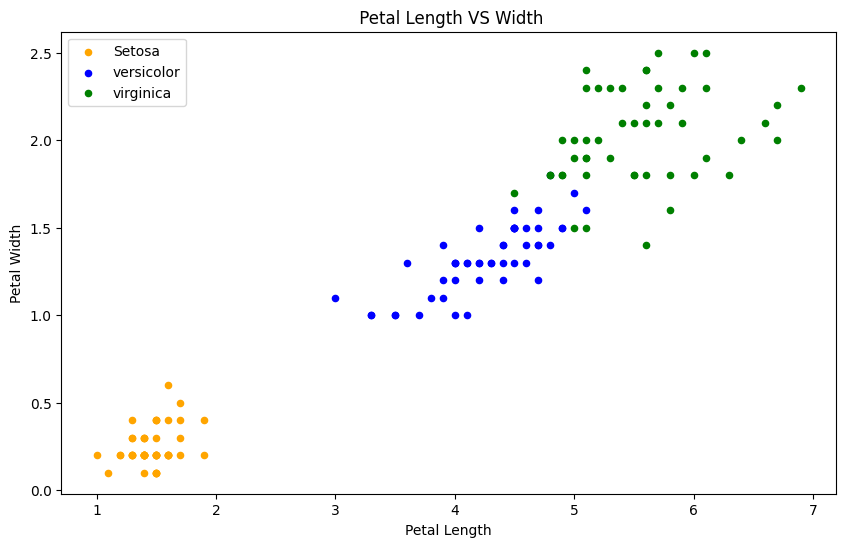

In [14]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

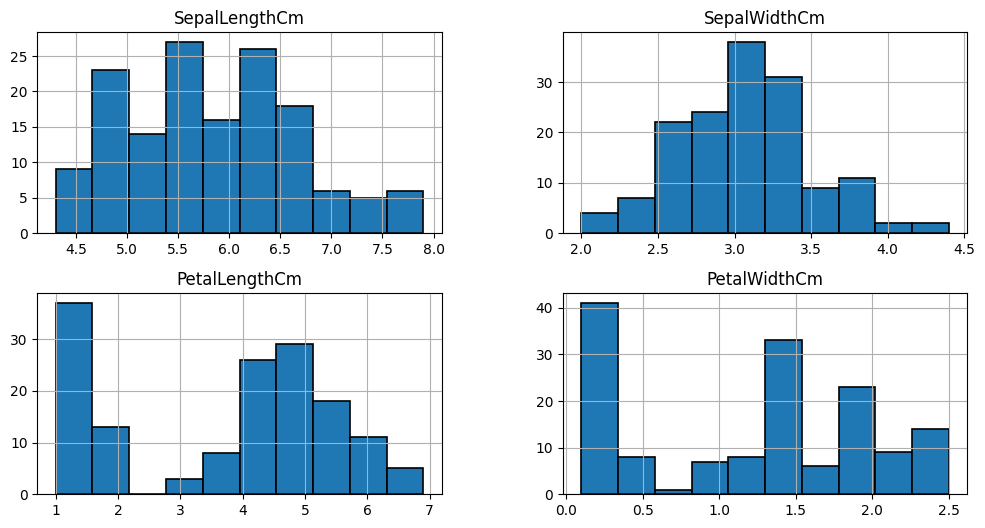

In [15]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

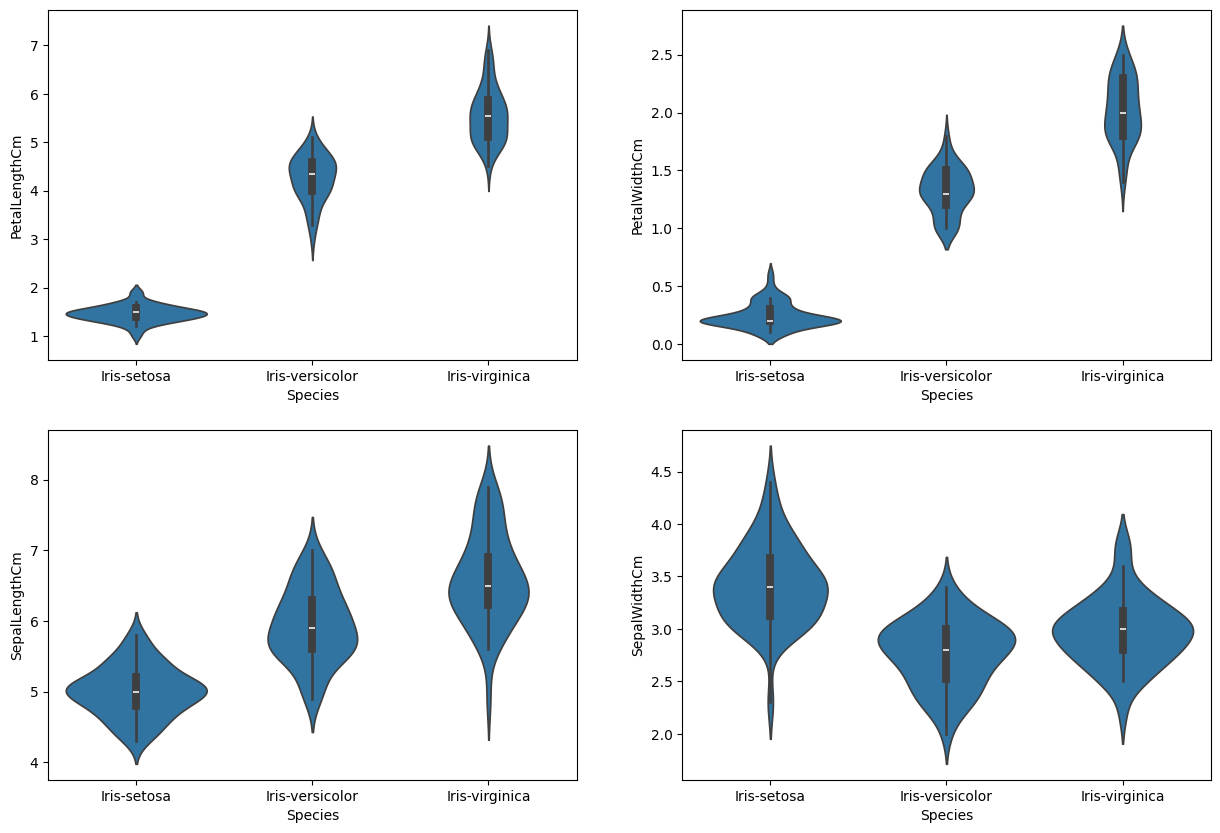

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [17]:
X = iris.drop('Species',axis=1) # Features
y = iris['Species'] # Target variable


print("\nFeatures (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())


Features (X):
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

Target variable (y):
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [18]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
X.shape

(150, 4)

In [21]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Unsupervised learning : Clustring

In [23]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X) #Features

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

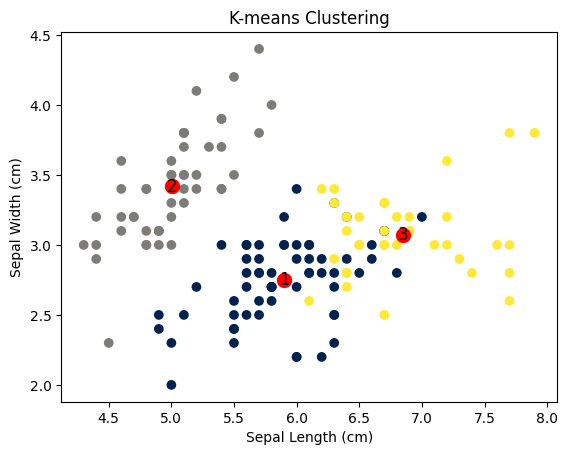

In [24]:
# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Predict the cluster labels for each data point
cluster_labels = kmeans.predict(X)

# Visualize the clusters and cluster centers
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='cividis', label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=100, color='red', label='Cluster Centers')
for i, center in enumerate(cluster_centers):
    plt.text(center[0], center[1], str(i+1), fontsize=12, color='black', ha='center', va='center')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering')
plt.show()


In [25]:
# Detect outliers using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
outliers_dbscan = dbscan.fit_predict(X)

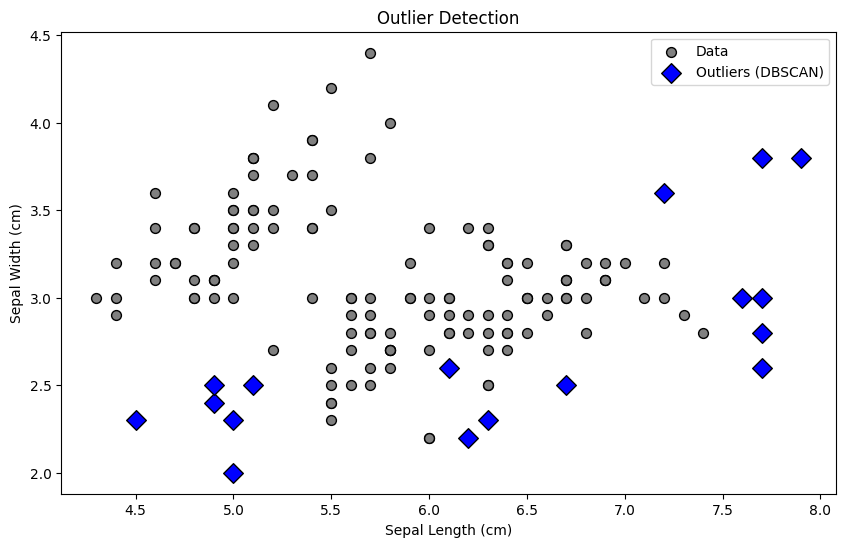

In [26]:
# Evaluate the clustering results (visualize outliers)
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='gray', s=50, marker='o', edgecolors='black', label='Data')
plt.scatter(X[outliers_dbscan == -1].iloc[:, 0], X[outliers_dbscan == -1].iloc[:, 1], c='blue', s=100, marker='D', edgecolors='black', label='Outliers (DBSCAN)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Outlier Detection')
plt.legend()
plt.show()

In [27]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5525919445499757


In [28]:
# Evaluate clustering results using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5525919445499757


# Supervised Learning: Baseline Model

In [73]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [74]:
print(X_train.shape)
print(X_test.shape)

(75, 4)
(75, 4)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [76]:

# Create baseline SVM model
baseline_svm = SVC(random_state=0)

# Train the model
baseline_svm.fit(X_train, y_train)
#  Evaluate the baseline model's performance
y_predict = baseline_svm.predict(X_test)
baseline_accuracy = accuracy_score(y_predict , y_test)
print("Logistic Regression baseline model accuracy: ", baseline_accuracy)

Logistic Regression baseline model accuracy:  0.9466666666666667


In [77]:
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
#  Evaluate the baseline model's performance
y_predict = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_predict , y_test)
print("Logistic Regression baseline model accuracy: ", baseline_accuracy)

Logistic Regression baseline model accuracy:  0.9333333333333333


In [79]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.88      0.97      0.92        30
 Iris-virginica       0.95      0.83      0.89        24

       accuracy                           0.93        75
      macro avg       0.94      0.93      0.94        75
   weighted avg       0.94      0.93      0.93        75



In [82]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [83]:
import pandas as pd
import seaborn as sns

In [84]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

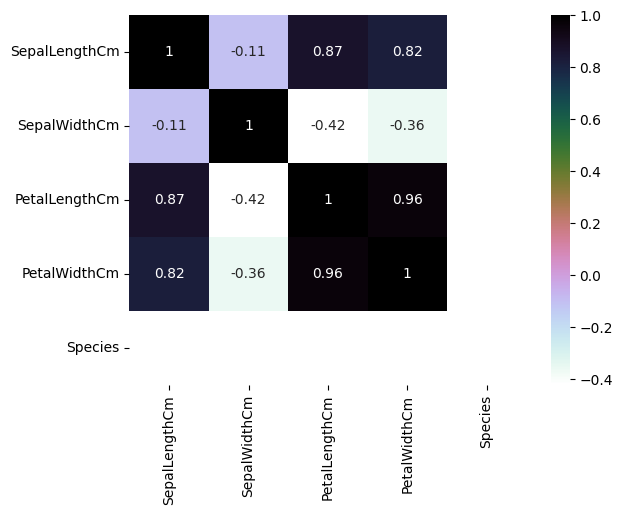

In [85]:
iris_numeric = iris.apply(pd.to_numeric, errors='coerce')
sns.heatmap(iris_numeric.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [86]:
train, test = train_test_split(iris, test_size = 0.3, random_state=0)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [87]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [88]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8


In [89]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0


In [90]:
train_y.head()  ##output of the training data

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

In [91]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm.
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


In [92]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


In [93]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777


In [94]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


In [95]:
from sklearn.metrics import accuracy_score

([<matplotlib.axis.XTick at 0x7b20584dd030>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

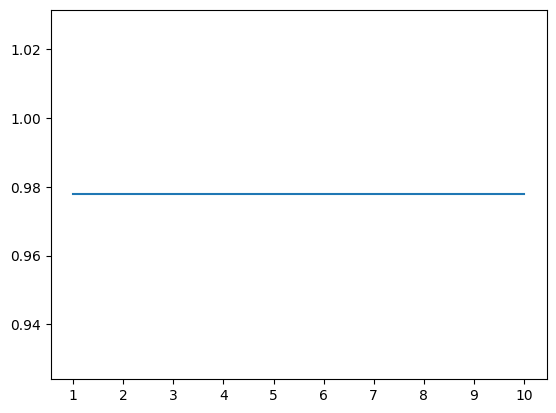

In [96]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=pd.concat([a,pd.Series(metrics.accuracy_score(prediction,test_y))],axis=0)
plt.plot(a_index, a)
plt.xticks(x)

In [97]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [98]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [99]:
model=svm.SVC()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [100]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [101]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [102]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid as a list of dictionaries
param_grid = [{'max_depth': [2], 'random_state': [0]}]

# Create a DecisionTreeClassifier instance
model = DecisionTreeClassifier()

# Perform grid search with cross-validation to find the best combination of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3)

# Fit the grid search object to the training data to identify the optimal hyperparameters
grid_search.fit(train_X, train_y)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .......max_depth=2, random_state=0;, score=0.810 total time=   0.0s
[CV 2/5] END .......max_depth=2, random_state=0;, score=1.000 total time=   0.0s
[CV 3/5] END .......max_depth=2, random_state=0;, score=1.000 total time=   0.0s
[CV 4/5] END .......max_depth=2, random_state=0;, score=0.905 total time=   0.0s
[CV 5/5] END .......max_depth=2, random_state=0;, score=0.952 total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2], 'random_state': [0]}], verbose=3)

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid as a list of dictionaries
param_grid = [{'max_depth': [2], 'random_state': [0]}]

# Create a DecisionTreeClassifier instance
model = DecisionTreeClassifier()

# Perform grid search with cross-validation to find the best combination of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3)

# Fit the grid search object to the training data to identify the optimal hyperparameters
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .......max_depth=2, random_state=0;, score=0.810 total time=   0.0s
[CV 2/5] END .......max_depth=2, random_state=0;, score=1.000 total time=   0.0s
[CV 3/5] END .......max_depth=2, random_state=0;, score=1.000 total time=   0.0s
[CV 4/5] END .......max_depth=2, random_state=0;, score=0.905 total time=   0.0s
[CV 5/5] END .......max_depth=2, random_state=0;, score=0.952 total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2], 'random_state': [0]}], verbose=3)

In [105]:
# Importing GridSearchCV from scikit-learn's model_selection module
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for hyperparameter tuning
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

# Creating a K-nearest neighbors classifier instance
knn_clf = KNeighborsClassifier()

# Performing grid search with cross-validation to find the best combination of hyperparameters
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)

# Fitting the grid search object to the training data to identify the optimal hyperparameters
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.933 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.933 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [106]:
# Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem.
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNeighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC())
]

pipelines = []
for clf_name, clf in classifiers:
    pipeline = Pipeline([
        ('classifier', clf)
    ])
    pipelines.append((clf_name, pipeline))

In [107]:
# Evaluate each classifier using cross-validation
#scorer = make_scorer(accuracy_score)
scorer_precision = make_scorer(precision_score, average='weighted')
scorer_recall = make_scorer(recall_score, average='weighted')

for clf_name , pipeline in pipelines:
  scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
  precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer_precision)
  recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer_recall)

  print(f'{clf_name}:')
  print(f'Mean accuracy: {scores.mean():.4f} ', f'Mean precision: {precision.mean():.4f}' , f'Mean recall: {recall.mean():.4f}\n')

Decision Tree:
Mean accuracy: 0.9333  Mean precision: 0.9406 Mean recall: 0.9333

KNeighbors:
Mean accuracy: 0.9733  Mean precision: 0.9775 Mean recall: 0.9733

Support Vector Machine:
Mean accuracy: 0.9867  Mean precision: 0.9889 Mean recall: 0.9867



In [108]:
# Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem.
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

pipelines = []
for clf_name, clf in classifiers:
    pipeline = Pipeline([
        ('classifier', clf)
    ])
    pipelines.append((clf_name, pipeline))

In [109]:
# Evaluate each classifier using cross-validation
#scorer = make_scorer(accuracy_score)
scorer_precision = make_scorer(precision_score, average='weighted')
scorer_recall = make_scorer(recall_score, average='weighted')

for clf_name , pipeline in pipelines:
  scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
  precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer_precision)
  recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer_recall)

  print(f'{clf_name}:')
  print(f'Mean accuracy: {scores.mean():.4f} ', f'Mean precision: {precision.mean():.4f}' , f'Mean recall: {recall.mean():.4f}\n')

Decision Tree:
Mean accuracy: 0.9333  Mean precision: 0.9512 Mean recall: 0.9333

Random Forest:
Mean accuracy: 0.9467  Mean precision: 0.9619 Mean recall: 0.9600

Support Vector Machine:
Mean accuracy: 0.9867  Mean precision: 0.9889 Mean recall: 0.9867



In [111]:
# Define hyperparameters grid for each classifier
param_grids = {
    'Decision Tree': {'classifier__max_depth': [5,10, 15] , 'classifier__random_state': [5 , 200 , 1000 , 20000, 30000 , 10 ]},
    'Random Forest': {'classifier__n_estimators': [50, 100, 200]}, # Added parameters for Random Forest
    'Support Vector Machine': {'classifier__C': [0.1, 1, 10 , 100], 'classifier__gamma': ['scale', 'auto'] , 'classifier__kernel': ['poly', 'rbf']}
}

# Perform hyperparameter tuning for each classifier
best_estimators = {}
for clf_name, pipeline in pipelines:
    param_grid = param_grids[clf_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(train_X, train_y)
    best_estimators[clf_name] = grid_search.best_estimator_
    print(f'Best hyperparameters for {clf_name}: {grid_search.best_params_}')
    print(f'Best accuracy: {grid_search.best_score_:.4f}\n')

Best hyperparameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__random_state': 5}
Best accuracy: 0.9524

Best hyperparameters for Random Forest: {'classifier__n_estimators': 50}
Best accuracy: 0.9429

Best hyperparameters for Support Vector Machine: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best accuracy: 0.9714

